In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris()
print("feature_names: "+str(iris['feature_names']))
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data.head(3)

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [3]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
target_name = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

In [5]:
iris_data['target_name'] = iris_data['target'].map(target_name)
iris_data = iris_data[(iris_data['target_name'] == 'setosa')|(iris_data['target_name'] == 'versicolor')]
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target_name']]
iris_data.head(5)

,sepal length (cm),petal length (cm),target_name
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


In [6]:
target_class = {
    'setosa':1,
    'versicolor':-1
}

In [7]:
iris_data['target_class'] = iris_data['target_name'].map(target_class)

In [8]:
del iris_data['target_name']

In [9]:
iris_data.head()

,sepal length (cm),petal length (cm),target_class
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1


In [10]:
iris_data1, iris_data2, iris_data3 = iris_data, iris_data, iris_data
iris_data1 = iris_data1.drop(98)
iris_data2 = iris_data2.append({'sepal length (cm)':5, 'petal length (cm)':2.4, 'target_class':1},ignore_index=True)
iris_data3 = iris_data3.append({'sepal length (cm)':6.5, 'petal length (cm)':4.0, 'target_class':1},ignore_index=True)

C:\Users\mrtar\AppData\Local\Temp\ipykernel_1880\849359105.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iris_data2 = iris_data2.append({'sepal length (cm)':5, 'petal length (cm)':2.4, 'target_class':1},ignore_index=True)
C:\Users\mrtar\AppData\Local\Temp\ipykernel_1880\849359105.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iris_data3 = iris_data3.append({'sepal length (cm)':6.5, 'petal length (cm)':4.0, 'target_class':1},ignore_index=True)


(5.0, -3.0)

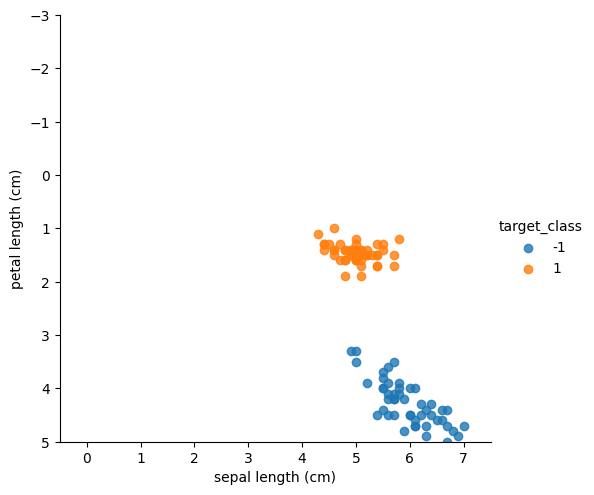

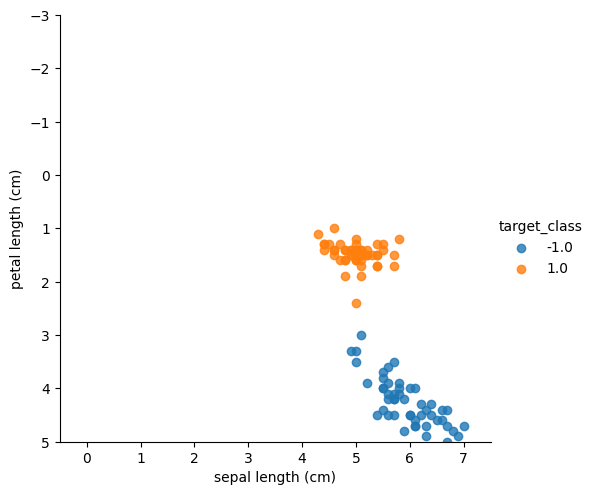

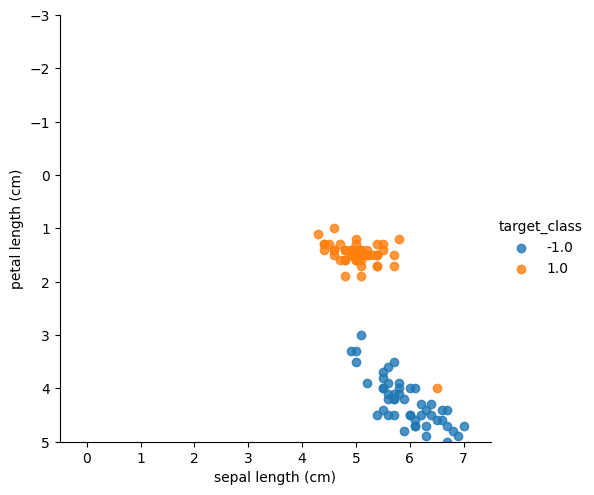

In [11]:
sns.lmplot(x='sepal length (cm)',y='petal length (cm)',data=iris_data1, fit_reg=False, hue ='target_class')
plt.xlim(-0.5,7.5)
plt.ylim(5,-3)
sns.lmplot(x='sepal length (cm)',y='petal length (cm)',data=iris_data2, fit_reg=False, hue ='target_class')
plt.xlim(-0.5,7.5)
plt.ylim(5,-3)
sns.lmplot(x='sepal length (cm)',y='petal length (cm)',data=iris_data3, fit_reg=False, hue ='target_class')
plt.xlim(-0.5,7.5)
plt.ylim(5,-3)

In [12]:
def sign(z):
    if z > 0:
        return 1
    else:
        return -1


In [13]:


def Pocket(data, max_iter=100):
    w = np.array([0., 0., 0.])
    pocket = w.copy()
    error = 1
    pocket_error = len(data)

    for i in range(max_iter):
        if error == 0:
            break

        error = 0

        for j in range(len(data)):
            x, y = np.concatenate((np.array([1.]), np.array(data.iloc[j])[:2])), np.array(data.iloc[j])[2]
            if sign(np.dot(w, x)) != y:
                error += 1
                w += y * x

                if error < pocket_error:
                    pocket = w.copy()
                    pocket_error = error

        # plot current decision boundary
    sns.lmplot(x='sepal length (cm)', y='petal length (cm)', data=data, fit_reg=False, hue='target_class')
    x_decision_boundary = np.linspace(-0.5, 7)
    y_decision_boundary = (-w[1]/w[2]) * x_decision_boundary - (w[0]/w[2])
    plt.plot(x_decision_boundary, y_decision_boundary, 'r')

    # plot pocket decision boundary
    x_pocket_decision_boundary = np.linspace(-0.5, 7)
    y_pocket_decision_boundary = (-pocket[1]/pocket[2]) * x_pocket_decision_boundary - (pocket[0]/pocket[2])
    plt.plot(x_pocket_decision_boundary, y_pocket_decision_boundary, 'g--')

    plt.xlim(-0.5, 7.5)
    plt.ylim(5, -3)
    plt.show()

    print("Number of errors:", pocket_error)
    print("Pocket weight vector:", pocket)

    return pocket


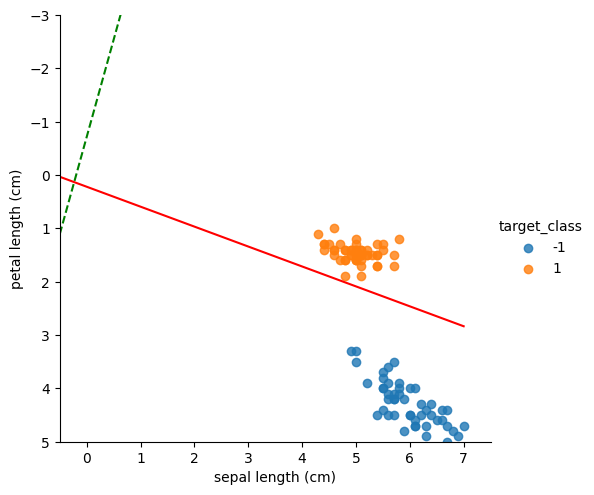

Number of errors: 1
Pocket weight vector: [1.  5.1 1.4]


array([1. , 5.1, 1.4])

In [15]:
Pocket(iris_data1)

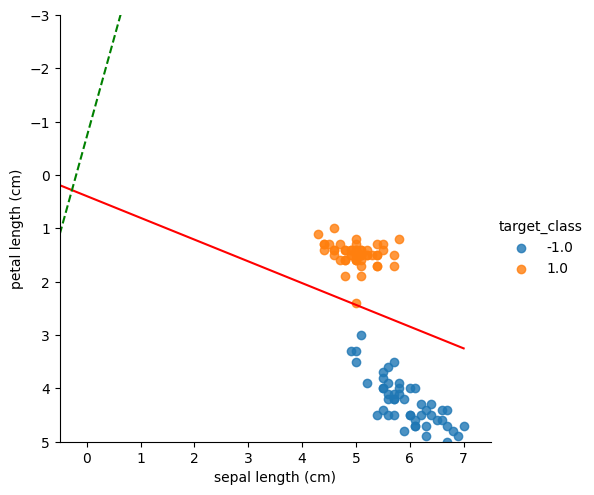

Number of errors: 1
Pocket weight vector: [1.  5.1 1.4]


array([1. , 5.1, 1.4])

In [14]:
Pocket(iris_data2)

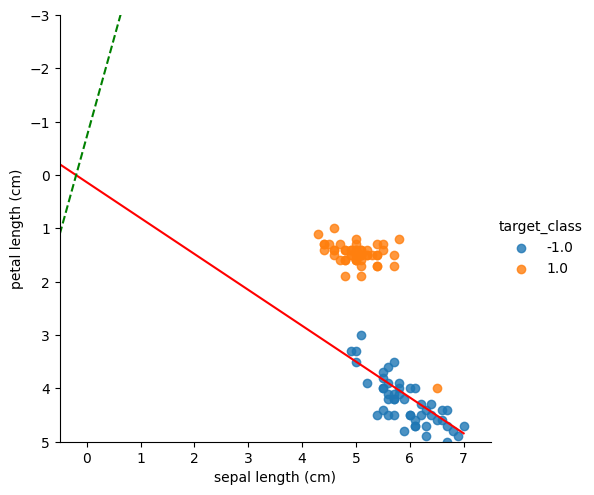

Number of errors: 1
Pocket weight vector: [1.  5.1 1.4]


array([1. , 5.1, 1.4])

In [18]:
Pocket(iris_data3)